Import necessary modules

In [2]:
import pandas as pd
import numpy as np
import os 
import datetime as dt
import matplotlib.pyplot as plt
from numpy import random


Read my dataset

In [3]:
sales=pd.read_excel("Copy of Mopart_ 2024 Sales Record.xlsx",index_col='Date ')

Glimpse of my data

In [4]:
sales.head(20)

,Product,Amount
Date,,
2024-01-02,bearing,400
2024-01-02,diesel tank,10000
2024-01-03,cleb c rubber,1000
2024-01-04,spring main cxz|R|,4000
2024-01-04,pipe,300
2024-01-05,spring txd,1400
2024-01-05,radiator txd,12500
2024-01-05,hub kobora,5500
2024-01-05,fan cxz,3000


In [5]:
sales.columns

Index(['Product', 'Amount'], dtype='object')

In [6]:
sales.describe()

,Amount
count,2541.000000
mean,6607.434081
std,12263.138175
min,40.000000
25%,1300.000000
50%,3000.000000
75%,6000.000000
max,170000.000000


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2541 entries, 2024-01-02 to 2024-12-31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  2541 non-null   object
 1   Amount   2541 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 59.6+ KB


Checking the data types

In [8]:
print(sales.index.dtype)
print(sales['Amount'].dtype)
print(sales['Product'].dtype)

print(sales.dtypes)

datetime64[ns]
int64
object
Product    object
Amount      int64
dtype: object


Checking missing values

In [9]:
sales.isnull()

,Product,Amount
Date,,
2024-01-02,False,False
2024-01-02,False,False
2024-01-03,False,False
2024-01-04,False,False
2024-01-04,False,False
...,...,...
2024-12-31,False,False
2024-12-31,False,False
2024-12-31,False,False


In [10]:
#checking missing values
hakuna=pd.isnull(sales)
print(hakuna)

null=sales[hakuna['Amount']==True]
print(null)

            Product  Amount
Date                       
2024-01-02    False   False
2024-01-02    False   False
2024-01-03    False   False
2024-01-04    False   False
2024-01-04    False   False
...             ...     ...
2024-12-31    False   False
2024-12-31    False   False
2024-12-31    False   False
2024-12-31    False   False
2024-12-31    False   False

[2541 rows x 2 columns]
Empty DataFrame
Columns: [Product, Amount]
Index: []


Compute the total sales per month

In [11]:
##resample the date per month
month_res=sales.resample('M')
month_res.size()
tot_sales_per_month=month_res['Amount'].sum().sort_values(ascending=False)
tot_sales_per_month

C:\Users\evans\AppData\Local\Temp\ipykernel_7852\1150031090.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_res=sales.resample('M')


Date 
2024-07-31    2334700
2024-11-30    1736620
2024-12-31    1618950
2024-08-31    1595570
2024-10-31    1285050
2024-05-31    1266200
2024-09-30    1265400
2024-02-29    1255710
2024-03-31    1245000
2024-06-30    1239800
2024-04-30    1105840
2024-01-31     840650
Name: Amount, dtype: int64

In [12]:
tot_sales_per_month.sort_values()

Date 
2024-01-31     840650
2024-04-30    1105840
2024-06-30    1239800
2024-03-31    1245000
2024-02-29    1255710
2024-09-30    1265400
2024-05-31    1266200
2024-10-31    1285050
2024-08-31    1595570
2024-12-31    1618950
2024-11-30    1736620
2024-07-31    2334700
Name: Amount, dtype: int64

                       Product  Amount  Month
Date                                         
2024-01-02             bearing     400      1
2024-01-02         diesel tank   10000      1
2024-01-03       cleb c rubber    1000      1
2024-01-04  spring main cxz|R|    4000      1
2024-01-04                pipe     300      1


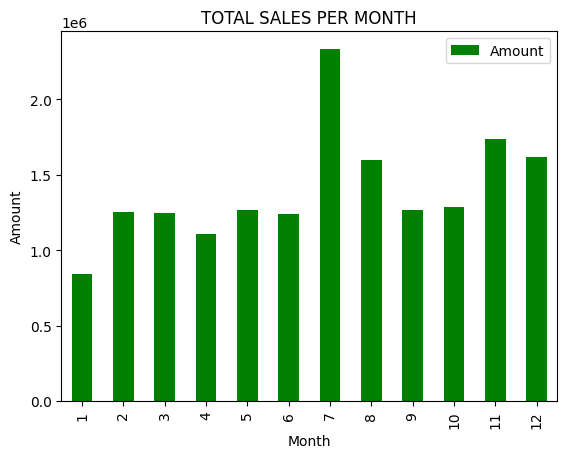

In [13]:
##using groupby
sales['Month']=sales.index.month
print(sales.head())

month_grp=sales.groupby(['Month'])
tot_per_month=month_grp['Amount'].sum()
tot_per_month_plot=tot_per_month.plot(kind='bar',xlabel='Month',ylabel='Amount',title='TOTAL SALES PER MONTH',color='green')
plt.legend()
#july had the best sales with over 2mil

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

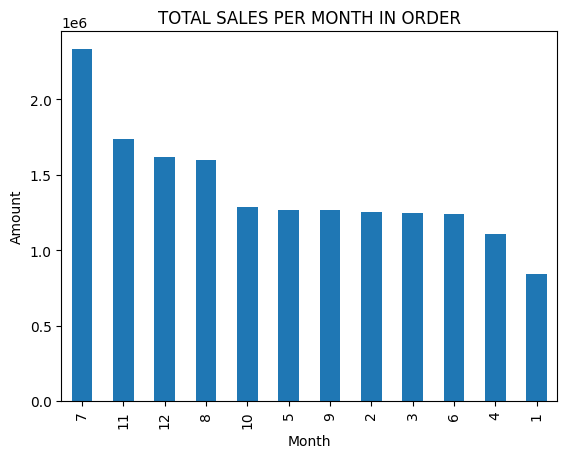

In [14]:
##total sales per month in order
tot_per_month_order=month_grp['Amount'].sum().sort_values(ascending=False)
tot_per_month_order_plot=tot_per_month_order.plot(kind='bar',xlabel='Month',ylabel='Amount',title='TOTAL SALES PER MONTH IN ORDER')
plt.legend

In [15]:
month_grp.size()

Month
1     150
2     208
3     236
4     196
5     217
6     229
7     254
8     243
9     211
10    196
11    206
12    195
dtype: int64

Maximum and Average sales

In [16]:
max_per_month=month_grp['Amount'].max()
print(max_per_month)

average_sales=month_grp['Amount'].mean()
print(average_sales)

average_sales.mean()

Month
1      75000
2     100000
3      80000
4      67000
5      70000
6      65000
7     170000
8     120000
9      77000
10     58000
11    140000
12     90000
Name: Amount, dtype: int64
Month
1     5604.333333
2     6037.067308
3     5275.423729
4     5642.040816
5     5835.023041
6     5413.973799
7     9191.732283
8     6566.131687
9     5997.156398
10    6556.377551
11    8430.194175
12    8302.307692
Name: Amount, dtype: float64


np.float64(6570.9801511386695)

In [26]:
# Create a list of the max amounts
max_amounts = [75000,100000,80000,67000,70000,65000,170000,120000,77000,58000,140000,90000]

# Filter rows where 'amount' matches any of the max values
# This assumes one unique max amount per month
max_rows = sales[sales['Amount'].isin(max_amounts)]

# Optional: sort by month
max_rows = max_rows.sort_values(by='Month')

print(max_rows[['Month', 'Product', 'Amount']])


            Month               Product  Amount
Date                                           
2024-01-06      1        front axle frr   75000
2024-01-31      1              diff txd   65000
2024-02-03      2              diff cxz   70000
2024-02-20      2             cabin fvr  100000
2024-02-29      2          gear fighter   77000
2024-03-04      3         front axle fh   70000
2024-03-06      3              diff cxz   80000
2024-04-30      4        front axle frr   67000
2024-05-06      5        front axle frr   70000
2024-05-14      5               gear fh   70000
2024-05-24      5        front axle fvr   65000
2024-06-10      6         front axle fh   65000
2024-07-01      7         front axle fh   58000
2024-07-05      7              gear frr  170000
2024-07-12      7               gear fh   80000
2024-07-27      7             gear tata   65000
2024-08-05      8  cabin ashock leyland  120000
2024-08-15      8        front axle fvz   80000
2024-08-31      8        front axle fvr 

In [27]:
max_rows.tail(20)

,Product,Amount,Month
Date,,,
2024-05-24,front axle fvr,65000,5
2024-06-10,front axle fh,65000,6
2024-07-01,front axle fh,58000,7
2024-07-05,gear frr,170000,7
2024-07-12,gear fh,80000,7
2024-07-27,gear tata,65000,7
2024-08-05,cabin ashock leyland,120000,8
2024-08-15,front axle fvz,80000,8
2024-08-31,front axle fvr,80000,8


In [16]:
#resample with respect to month end then calculate mean
sales['Amount'].resample('Me').mean()

C:\Users\evans\AppData\Local\Temp\ipykernel_13844\3684349756.py:1: FutureWarning: 'Me' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales['Amount'].resample('Me').mean()


Date 
2024-01-31    5604.333333
2024-02-29    6037.067308
2024-03-31    5275.423729
2024-04-30    5642.040816
2024-05-31    5835.023041
2024-06-30    5413.973799
2024-07-31    9191.732283
2024-08-31    6566.131687
2024-09-30    5997.156398
2024-10-31    6556.377551
2024-11-30    8430.194175
2024-12-31    8302.307692
Freq: ME, Name: Amount, dtype: float64

In [34]:
#tatal sales throughout the year
sales['Amount'].sum()

np.int64(16789490)

In [17]:
#average sales per month
tots=sales['Amount'].sum()
print(tots)
months=12
average=tots/months
average

16789490


np.float64(1399124.1666666667)

Frequently sold Items

In [18]:

frequent_products = sales['Product'].value_counts()
print(frequent_products)


Product
bolts                95
pipe                 88
main spring txd      57
bearing              54
springs              47
                     ..
pressure tank ftr     1
top cover frr         1
aircleaner frr        1
cutrange fh           1
axle npr              1
Name: count, Length: 1035, dtype: int64


In [28]:
frequent_products.head(50)

Product
bolts                 95
pipe                  88
main spring txd       57
bearing               54
springs               47
spring                37
axle txd              32
spring tata           31
rim txd               28
spring txd            27
hanger tata           21
hanger txd            21
studs                 19
gatembe fh            19
rim                   18
spring helper         18
bajol                 18
spring main txd       18
main spring tata      17
springs txd           17
main spring cxz       16
nut                   15
nuts                  15
axle fh               15
springs tata          15
bearings              14
three hole Tata       13
spring helpers        12
corn bearing          11
hanger                11
bearing txd           11
washers               11
pipes                 10
lock                  10
spring cxz            10
diff txd              10
wheel nuts            10
booster tata           9
spring main tata       9
hub fh           

In [31]:
#total revenue generated by springs
springs = sales['Product'].str.contains('spring', case=False, na=False)
tot_springs = sales.loc[springs, 'Amount'].sum()
print(tot_springs)

1936000


In [33]:
#creating an explicit function that filters out products containing specific strings from a list
def frequent_sales_total(df, product):
    """
    Calculate total sales amount for a specific product.

    Parameters:
    - df: pandas DataFrame with 'product' and 'amount' columns
    - product: string or keyword to search in the 'product' column

    Returns:
    - Total amount generated by the brand
    """
    products_dict={}
    for product in products:
        fil = df['Product'].str.contains(product, case=False, na=False)
        tots= df.loc[fil, 'Amount'].sum()
        products_dict[product]=tots
    return pd.Series(products_dict).sort_values(ascending=False)

products=['spring','springs','pipe','bolts','hanger tata','hanger txd','axle txd','bearing','rim']

freq_sales=frequent_sales_total(sales,products)
print(freq_sales)

spring         1936000
springs         760400
axle txd        487700
rim             387600
bearing         291100
bolts            98350
pipe             86400
hanger tata      74100
hanger txd       71900
dtype: int64


Top selling products

In [20]:
top_sales = sales.groupby('Product')['Amount'].sum().sort_values(ascending=False)
print(top_sales)


Product
diff txd          539000
axle txd          390500
front axle fh     370000
front axle frr    342000
front axle fvz    335000
                   ...  
pin                  100
nut                  100
through nut          100
pipe connector        50
pipe clip             50
Name: Amount, Length: 1035, dtype: int64


In [26]:
top_sales.head(10)

Product
diff txd          539000
axle txd          390500
front axle fh     370000
front axle frr    342000
front axle fvz    335000
diff fighter      332000
gear txd          263000
gear fh           233500
gear tata         227000
springs           194500
Name: Amount, dtype: int64

Best selling Brand

In [22]:
def count_matching_strings(df, column, keywords):
    """
    Count how many times each keyword appears in a column.

    Parameters:
    - df: pandas DataFrame
    - column: name of the column to search
    - keywords: list of strings to search for (case-insensitive)

    Returns:
    - pandas Series with keyword as index and counts as values
    """
    counts = {}
    for keyword in keywords:
        match = df[column].str.contains(keyword, case=True, na=False)
        counts[keyword] = match.sum()
    return pd.Series(counts).sort_values(ascending=False)



keywords=['txd','cxz','tata','frr','fh','igogo','toyota','ashock','fuso','fvz','fighter']

best_selling_brand=count_matching_strings(sales,'Product',keywords)
print(best_selling_brand)



txd        526
fh         194
cxz        160
tata       150
frr        114
fuso        52
fvz         48
fighter     41
igogo       28
ashock      16
toyota      15
dtype: int64


<Axes: title={'center': 'Best selling Vehicle Brand'}, xlabel='Vehicle Brand', ylabel='No of Entries'>

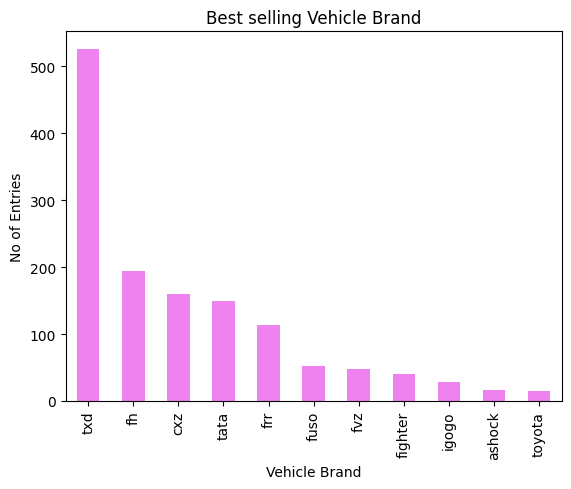

In [23]:
best_selling_brand_plot=best_selling_brand.plot(kind='bar',xlabel='Vehicle Brand',ylabel='No of Entries',title='Best selling Vehicle Brand',color='violet')
#plt.legend()
best_selling_brand_plot

In [24]:
def brand_sales_total(df, brand_names):
    """
    Calculate total sales amount for a specific brand.

    Parameters:
    - df: pandas DataFrame with 'product' and 'amount' columns
    - brand_name: string or keyword to search in the 'product' column

    Returns:
    - Total amount generated by the brand
    """
    brands={}
    for brand_name in brand_names:
        mask = df['Product'].str.contains(brand_name, case=False, na=False)
        total = df.loc[mask, 'Amount'].sum()
        brands[brand_name]=total
    return pd.Series(brands).sort_values(ascending=False)

brand_names=['txd','cxz','tata','frr','fh','igogo','toyota','ashock','fuso','fvz','fighter']

vbrand_sales=brand_sales_total(sales,brand_names)
vbrand_sales

txd        3418000
fh         2137500
frr        1475900
cxz        1423000
tata       1044600
fighter     768500
fvz         699050
fuso        605600
igogo       289700
ashock      184400
toyota       95100
dtype: int64

Axes(0.125,0.11;0.775x0.77)


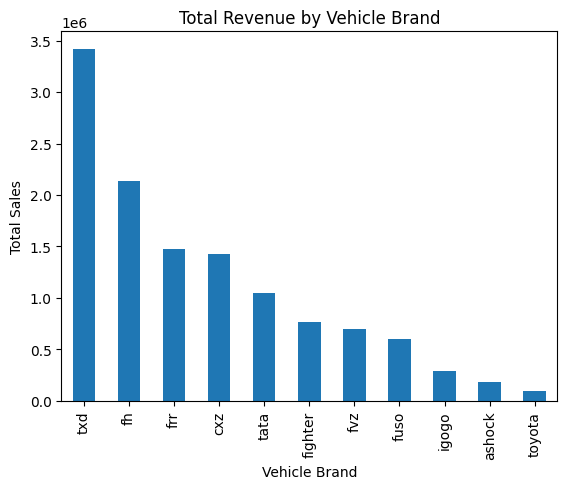

In [25]:
vbrand_sales_plot=vbrand_sales.plot(kind='bar',title='Total Revenue by Vehicle Brand',xlabel='Vehicle Brand',ylabel='Total Sales')
print(vbrand_sales_plot)